In [83]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage import data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
logo = io.imread('http://scikit-image.org/_static/img/logo.png')

In [12]:
image = io.imread('https://scipy-lectures.org/_images/sphx_glr_plot_camera_001.png')

In [17]:
camera = data.camera()

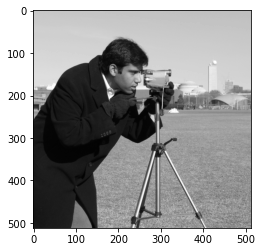

In [35]:
plt.imshow(camera,cmap='gray')

In [8]:
type(logo)

numpy.ndarray

In [19]:
camera.shape

(512, 512)

In [108]:
square_size=(16,16)

In [109]:
camera_collage=camera.reshape(camera.shape[0]//square_size[0],square_size[0],camera.shape[1]//square_size[1],square_size[1]).transpose((0,2,1,3)).reshape((camera.shape[0]//square_size[0]*camera.shape[1]//square_size[1],-1))

In [110]:
camera_collage.shape

(1024, 256)

In [159]:
compress_size=[15,15]

In [160]:
pca=PCA(n_components=compress_size[0]*compress_size[1])

In [161]:
scaler=StandardScaler()

In [162]:
camera_collage_zscore=scaler.fit_transform(camera_collage)

In [163]:
camera_collage_zscore[:,1].std()

1.0

In [164]:
camera_collage_compressed=pca.fit_transform(camera_collage_zscore)

In [165]:
camera_collage_restore=camera_collage_compressed.reshape((camera.shape[0]//square_size[0],camera.shape[1]//square_size[1],compress_size[0],compress_size[1])).transpose((0,2,1,3)).reshape((camera.shape[0]//square_size[0]*compress_size[0],camera.shape[1]//square_size[1]*compress_size[1]))

In [166]:
camera_collage_restore.shape

(480, 480)

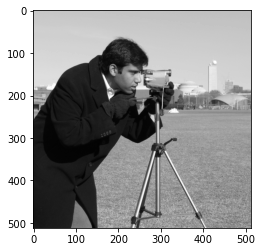

In [143]:
plt.imshow(camera,cmap='gray')

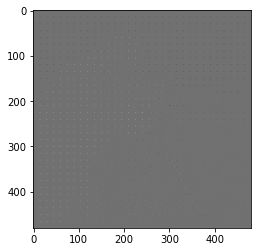

In [168]:
plt.imshow(camera_collage_restore,cmap='gray')

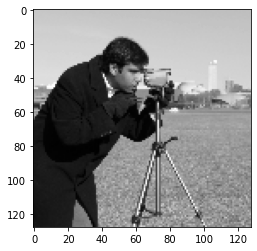

In [48]:
plt.imshow(camera_collage[:,1,:,1],cmap='gray')